### Student Performance Indicator

##### Life cycle of Machine Learning Project

* Understanding the problem statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose the best model

#### 1) Problem Statement

* This project understands how the student's performance (test-score) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

#### 2) Data Collection

* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

* The data consists of 8 columns and 1000 rows

##### 2.1 Import Data and Required Packages

###### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


###### Import the CSV Data as Pandas DataFrame

In [2]:
df=  pd.read_csv('data/StudentsPerformance.csv')

######  Show top 5 records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Shape of dataset

In [5]:
df.shape

(1000, 8)

2.2 Dataset Information

* gender: sex of students -> (Male/Female)
* race/ethnicity : ethnicity of students -> (Group A, B, C, D, E)
* Parental level of education: parents' final education -> (bachelor's degree, some college, master's degree, associate's degree, higer shcool)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course: complete or not complete before test
* math score
* reading score
* writing score

3. Data Checks to Perform

* check missing valus
* check Duplicates
* check data type
* check the number of unique values of each column
* check statistics of data set
* check various categories present in the different categorical column

3.1 Check Missing Values

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset

3.2 Check Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

There are no duplicate values in the dataset

3.3 Check data types

In [9]:
# Check null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Checking the number of unique values of each column

In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

3.5 Check statistics of dataset

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight

* From above description of numerical data, all means are very close to each other - between 66 and 68.05:
* All standard deviations are close - between 14.6 and 15.19;
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading yet higher = 17

3.7 Exploring Data

In [14]:
print("categories in 'gender' variable:    ", end=" ")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable:    ", end=" ")
print(df['race/ethnicity'].unique())

print("categories in 'parental level of education' variable:    ", end=" ")
print(df['parental level of education'].unique())

print("categories in 'lunch' variable:    ", end=" ")
print(df['lunch'].unique())

print("categories in 'test preparation course' variable:    ", end=" ")
print(df['test preparation course'].unique())

categories in 'gender' variable:     ['female' 'male']
categories in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:     ['standard' 'free/reduced']
categories in 'test preparation course' variable:     ['none' 'completed']


In [15]:
# define numerical & categorical columns
numeric_featues = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print columns
print('We have {} numerical features : {}'.format(len(numeric_featues), numeric_featues))
print('\nWe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


3.8 Adding columns for 'Total Score' and 'Average'

In [17]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']

df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f"Number of students with full marks in Maths: {math_full}")
print(f"Number of students with full marks in Writing: {writing_full}")
print(f"Number of students with full marks in Reading: {reading_full}")


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [20]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in reading: 1


Insights

* From above values we get students have performed the worst in Maths
* Best Performance is in reading section

4. Exploring Data (Visualization)

4.1 Visualize average score distribution to make some conclusion

* Histogram
* Kernal Distribution Function(KDE)

4.1.1 Histogram & KDE

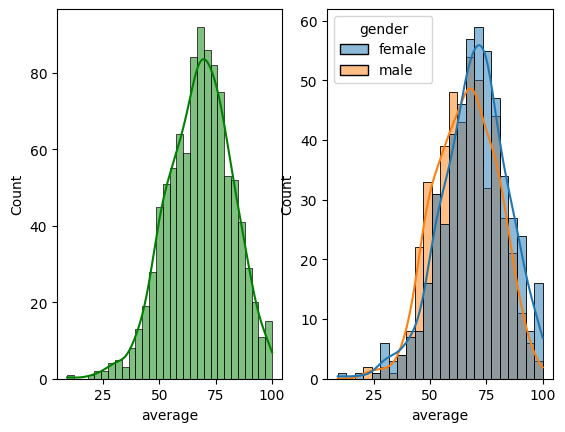

In [23]:
fig, axs = plt.subplots(1,2, figure=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average', bins=30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

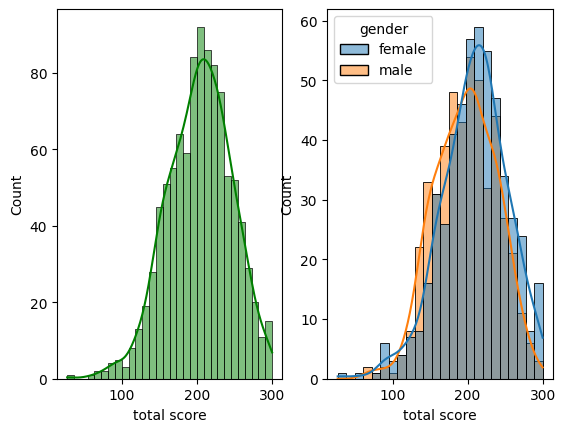

In [24]:
fig, axs = plt.subplots(1,2, figure=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score', bins=30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

Insights

* Female students tends to perform well than male students

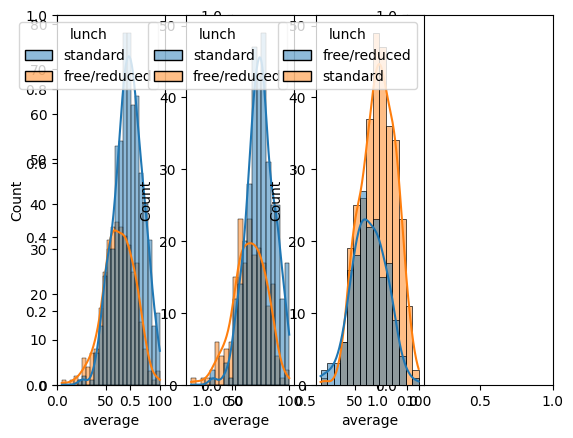

In [26]:
plt.subplots(1,3, figure=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insights

* Standard lunch helps perform well in exams
* Standard lunch helps perform well in exams be it a male or a female 